**Question 1**

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

Plot the data set:

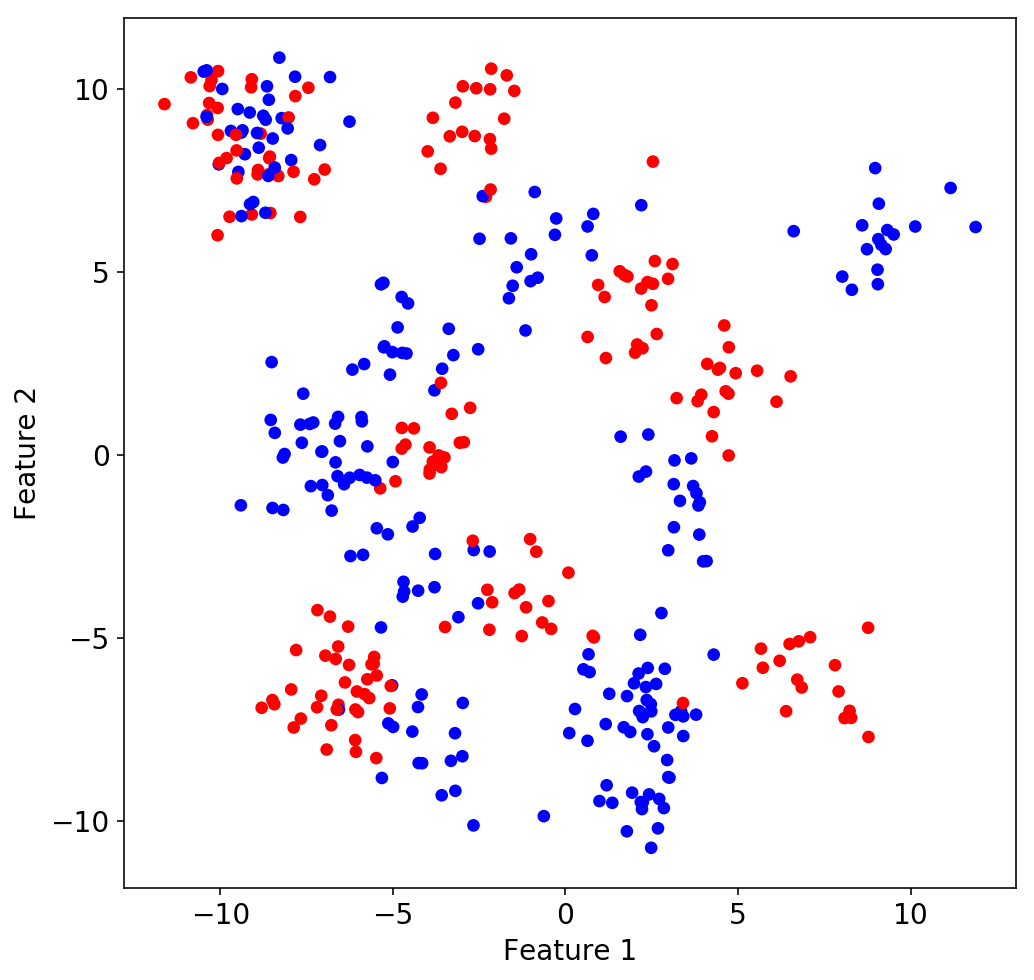

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Now the data set is plit into a train and a test set. This split is done randomly to avoid the effects of ordering in the dataset (if it is present). The train set will be half of the total data set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

Train the classifier on the training data set and evaluate the quality (here with the default score):

In [5]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
print(clf.score(X_train,y_train))

0.91


Evaluate the score on the testing sample:

In [7]:
print(clf.score(X_test,y_test))

0.865


Repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...)

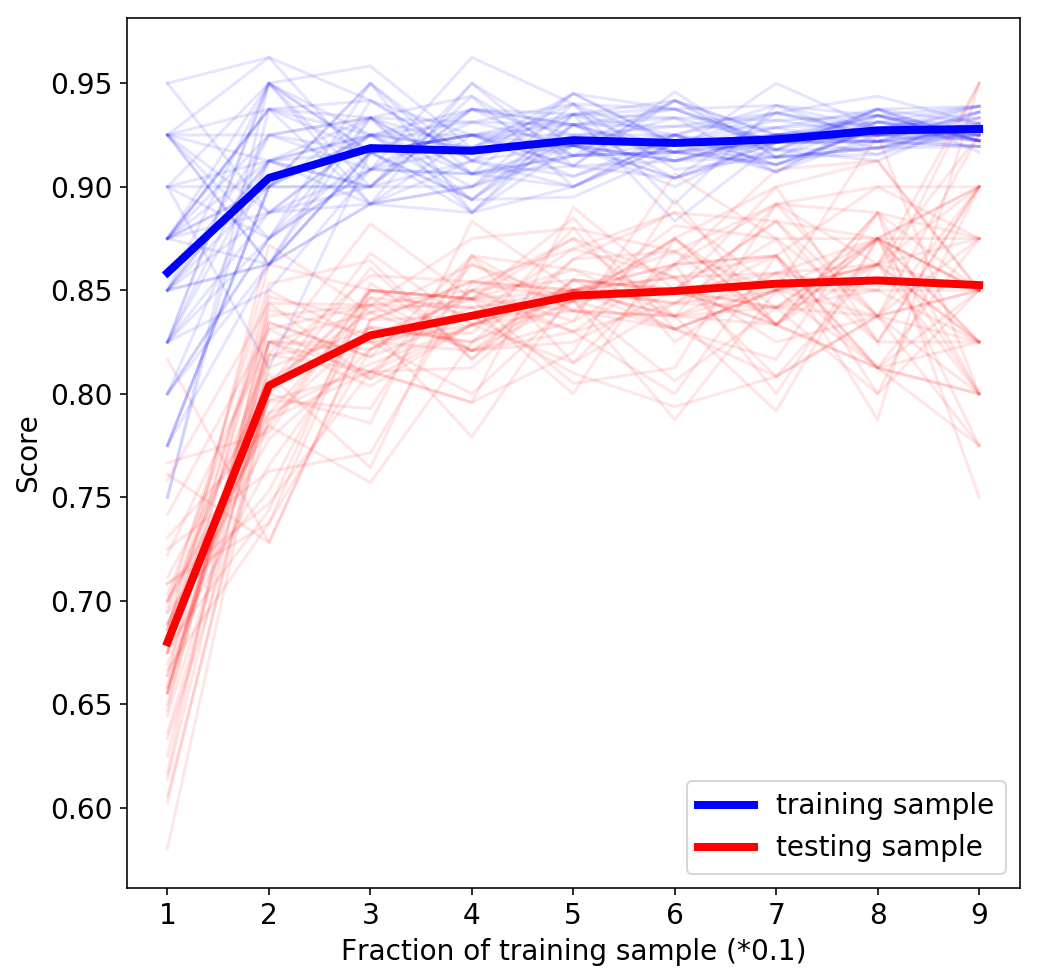

In [8]:
acc_train = []
acc_test = []
ks = range(1,10)

for n in range(50):
    score_train = []
    score_test = []
    for i in range (1,10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=(i*0.1))
        clf.fit(X_train, y_train)
        score_train.append(clf.score(X_train,y_train))
        score_test.append(clf.score(X_test,y_test))
    plt.plot(ks, np.array(score_train), '-b', alpha=0.1)
    plt.plot(ks, np.array(score_test), '-r', alpha=0.1)
    acc_train.append(score_train)
    acc_test.append(score_test)   

plt.plot(ks, np.array(acc_train).mean(axis=0), '-b', label='training sample', lw=4)
plt.plot(ks, np.array(acc_test).mean(axis=0), '-r', label='testing sample', lw=4)
plt.legend(loc='best')
plt.xlabel("Fraction of training sample (*0.1)")
plt.ylabel("Score")

We can see that the performance on the training sample seems to grow as the fraction of training data grows. However, the performance on the testing sample reaches a plateau and seems to show much more fluctuations for fractions of training data above 60%. The best way to split the data is a trade off between the performance on both samples and the variation of the results on the testing sample. An acceptable value for the split seems to be 0.5.

The performance on the testing sample is lower than the one on the training sample, which probably means that the classifier is not trained enough.

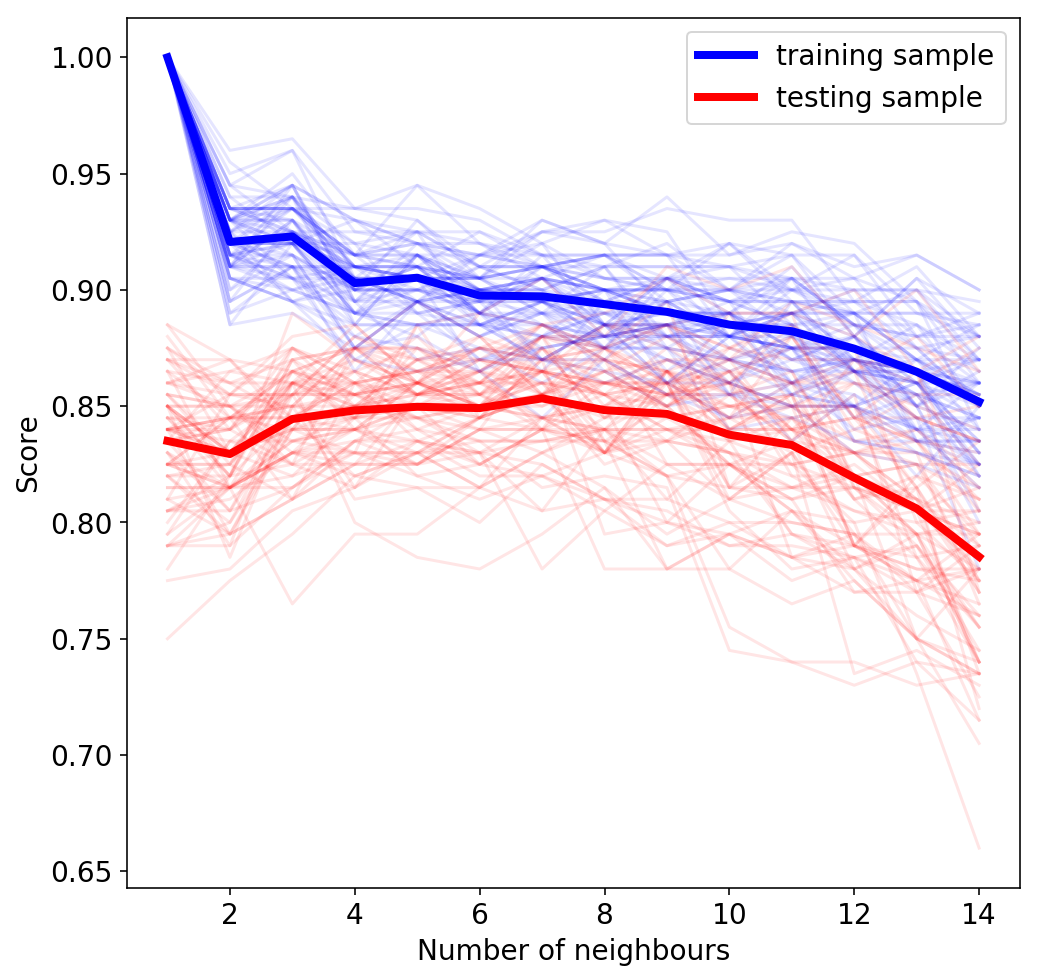

In [9]:
acc_train = []
acc_test = []
ks = range(1,15)

for n in range(80):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    score_train = []
    score_test = []
    for i in range (1,15):
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train, y_train)
        clf.fit(X_train, y_train)
        score_train.append(clf.score(X_train,y_train))
        score_test.append(clf.score(X_test,y_test))
    plt.plot(ks, np.array(score_train), '-b', alpha=0.1)
    plt.plot(ks, np.array(score_test), '-r', alpha=0.1)
    acc_train.append(score_train)
    acc_test.append(score_test)
    
plt.plot(ks, np.array(acc_train).mean(axis=0), '-b', label='training sample', lw=4)
plt.plot(ks, np.array(acc_test).mean(axis=0), '-r', label='testing sample', lw=4)
plt.legend(loc='best')
plt.xlabel("Number of neighbours")
plt.ylabel("Score")

Here it seems that:
- the performance on the training data set is always decreasing whereas the one on the testing data set increases first and reaches a maximum.
- the performance on the testing data set is mostly below the performance on the training data set
- for more than 7 neighbours, both performances decrease as the number of neighbours increases
- the performance on the testing sample varies a lot more as the number of neighbours increases

A classifier with less neighbours is more complicated because it has more degrees of freedom. So a classifier with 4 neighbours is more complicated than one with 10.

A number of neighbours of 5 seems to be the best setting for this data set because it's the one with highest performance on the testing sample (along with 7 neighbours) and it also has the lowest variability.

**Question 2**

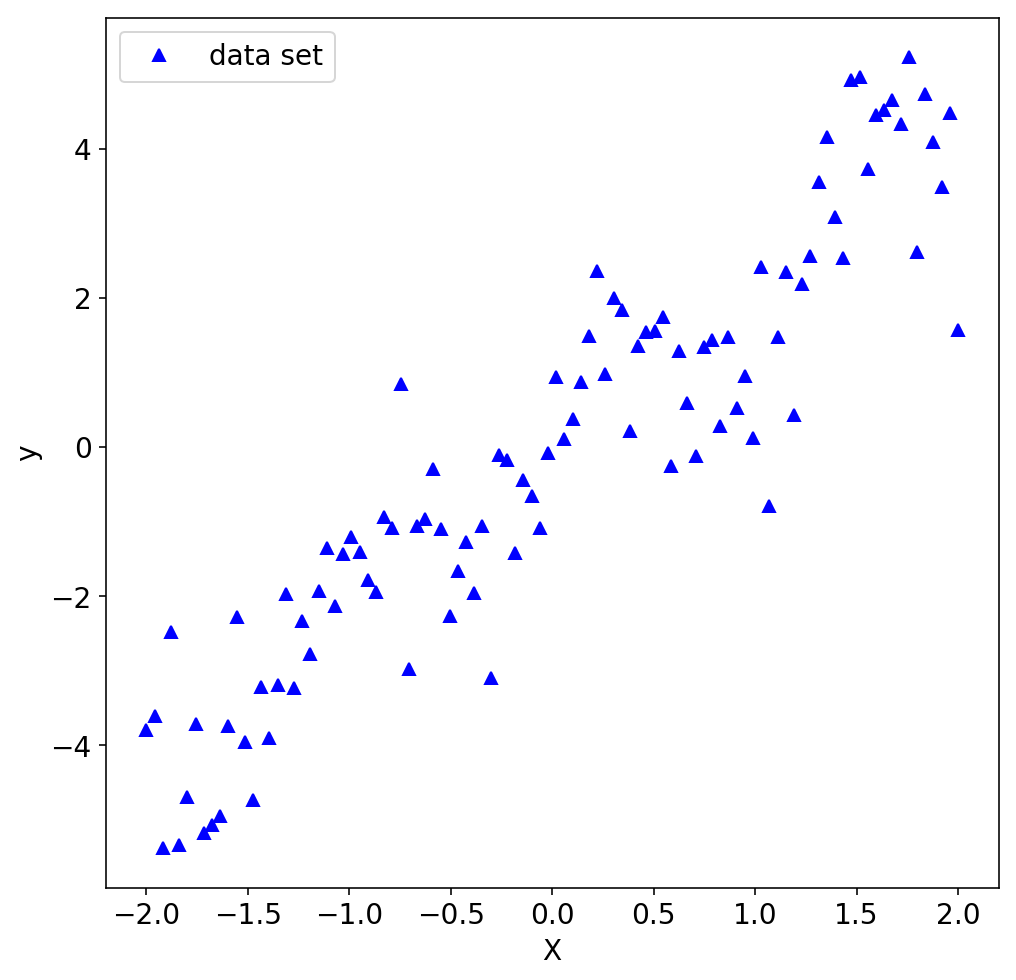

In [10]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

X, y = make_regression()

plt.plot(X, y, '^b', label='data set')
plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("y")

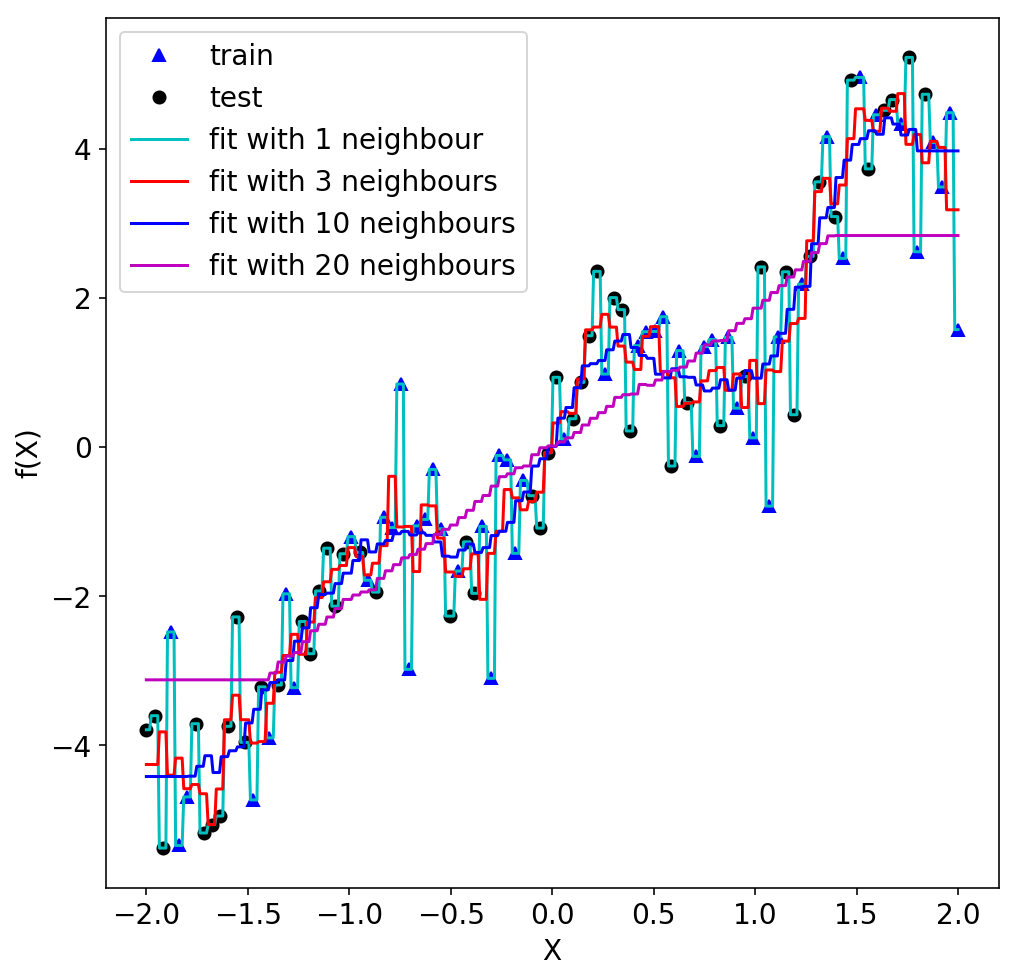

In [11]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

rgr1 = KNeighborsRegressor(n_neighbors=1)
rgr1.fit(X, y)
rgr = KNeighborsRegressor(n_neighbors=3)
rgr.fit(X, y)
rgr10 = KNeighborsRegressor(n_neighbors=10)
rgr10.fit(X, y)
rgr30 = KNeighborsRegressor(n_neighbors=30)
rgr30.fit(X, y)

line = np.linspace(-2, 2, 500).reshape(-1, 1)

plt.plot(X_train, y_train, '^b', label='train')
plt.plot(X_test, y_test, 'ok', label='test')
plt.plot(line, rgr1.predict(line), '-c', label='fit with 1 neighbour')
plt.plot(line, rgr.predict(line), '-r', label='fit with 3 neighbours')
plt.plot(line, rgr10.predict(line), '-b', label='fit with 10 neighbours')
plt.plot(line, rgr30.predict(line), '-m', label='fit with 20 neighbours')
plt.legend(loc='best')
plt.xlabel("X")
plt.ylabel("f(X)");

[ 1.68332979  1.2016317   1.03571971  0.96247398  0.93340162  0.91880072
  0.93093006  0.95383746  0.99800406  1.06578218  1.15009117  1.24799762
  1.35465805  1.46751906  1.57550492  1.69229639  1.79796296  1.88502491
  1.97173197]


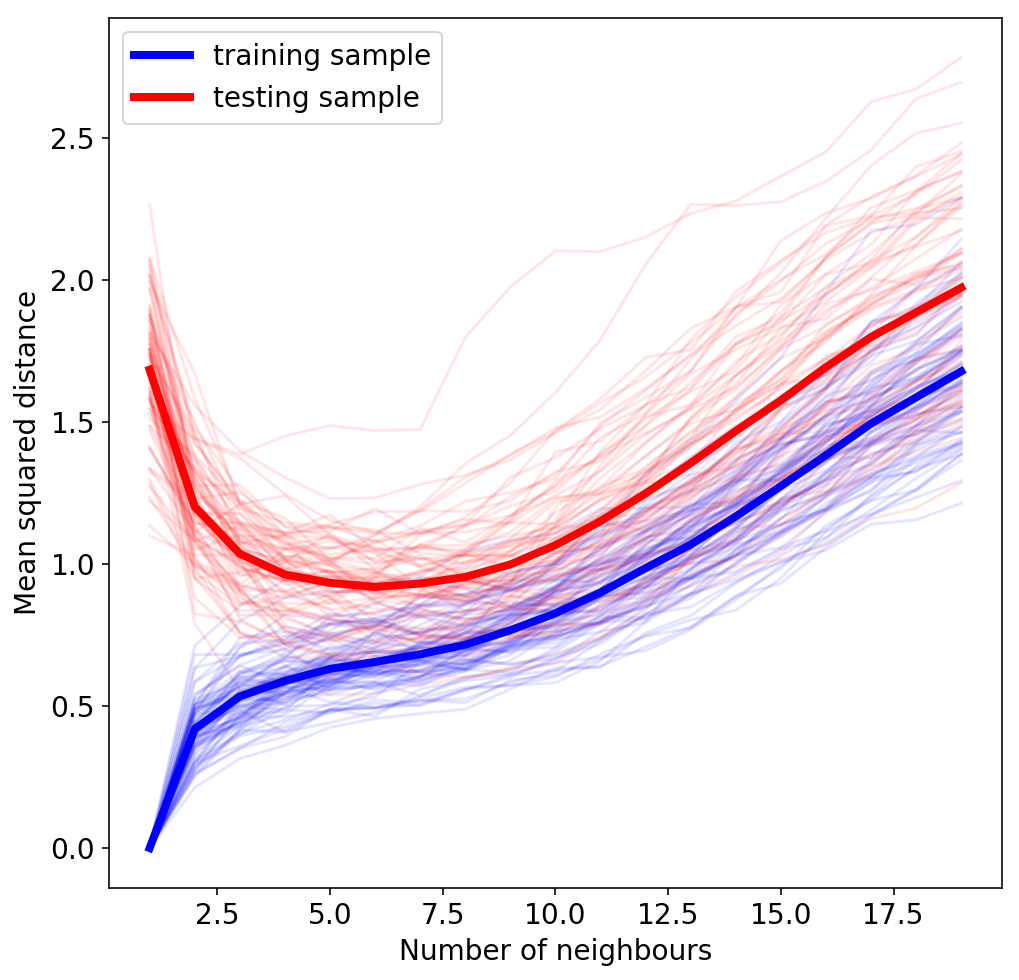

In [12]:
from sklearn.metrics import mean_squared_error


acc_train = []
acc_test = []
ks = range(1,20)

for n in range(80):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    meansq_train = []
    meansq_test = []
    for i in ks:
        rgr = KNeighborsRegressor(n_neighbors=i)
        rgr.fit(X_train, y_train)
        meansq_train.append(mean_squared_error(y_train, rgr.predict(X_train)))
        meansq_test.append(mean_squared_error(y_test, rgr.predict(X_test)))
    plt.plot(ks, np.array(meansq_train), '-b', alpha=0.1)
    plt.plot(ks, np.array(meansq_test), '-r', alpha=0.1)
    acc_train.append(meansq_train)
    acc_test.append(meansq_test)
    
plt.plot(ks, np.array(acc_train).mean(axis=0), '-b', label='training sample', lw=4)
plt.plot(ks, np.array(acc_test).mean(axis=0), '-r', label='testing sample', lw=4)
plt.legend(loc='best')
plt.xlabel("Number of neighbours")
plt.ylabel("Mean squared distance")
print (np.array(acc_test).mean(axis=0))

Here, the prefered number of neighbours is 6 to have the minimal average of mean squared distance on the testing samples.

The mean squared distance 'plateaus' between around 5 and 10 neighbours because it averages the simusoid into a straight line. Therefore, the distance squared between the true value and the fitted value follows a sinusoid squared, the integral (or sum) of which is 0.5 (because the range of x is bigger than the oscillation length).

**Question 3**

[[-1.33927988  1.19372879]]
[ 0.21429495]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


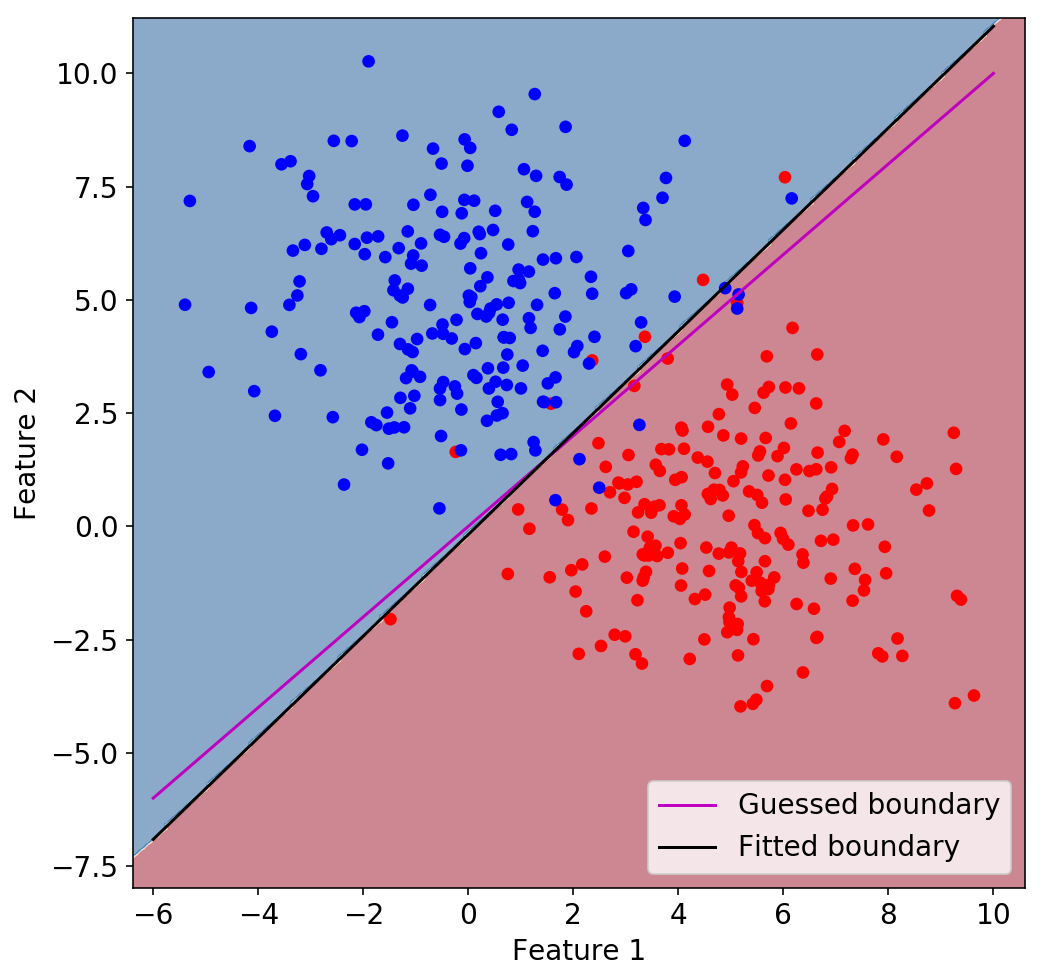

In [29]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()

labels = [0, 1]
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

rgr = LogisticRegression()
rgr.fit(X_train, y_train)

coef = rgr.coef_
intercept = rgr.intercept_

print (coef)
print (intercept)

# build our grid of values
h = 0.1  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 4, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = rgr.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
print (Z)
plt.figure()


plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)


def plot_hyperplane(coeff, interception):
    def line(x0):
        return (-(x0 * coeff[0, 0]) - interception[0]) / coeff[0, 1]
    plt.plot([-6, 10], [line(-6), line(10)], '-k', label='Fitted boundary' )

line = np.linspace(-6, 10, 500).reshape(-1, 1)

labelsS = ['b', 'r']
y = np.take(labelsS, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)


plt.plot(line, line, '-m', label='Guessed boundary')
plot_hyperplane(coef, intercept)
plt.legend(loc='best')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

The guessed boundary is y = x because it allows to have only 6 red points on the 'blue' side and 6 blue points on the 'red' side. The fitted boundary is very close to the guessed one because the blobs are respectively centered in (0,5) and (5,0) so we expect the boundary to be a line orthogonal to the line that relates the two blob centers, and at equal distance from them.

[[-1.20165047  1.20811365]]
[ 0.00129263]
[[-1.33718883  1.38345219]]
[-0.0148041]
[[-1.37208814  1.07616388]]
[ 0.98963]
[[-0.72875884  0.61305806]]
[ 0.1448222]
[[-0.41055045  0.36665506]]
[-0.06865714]
[[-0.22234043  0.21833075]]
[ 0.1169985]
[[-0.16481718  0.10667249]]
[ 0.12411971]
[[-0.15061899  0.11176481]]
[-0.06868554]
[[-0.09202908  0.06760503]]
[-0.12964952]
[[-0.04863074  0.06396705]]
[-0.04100146]


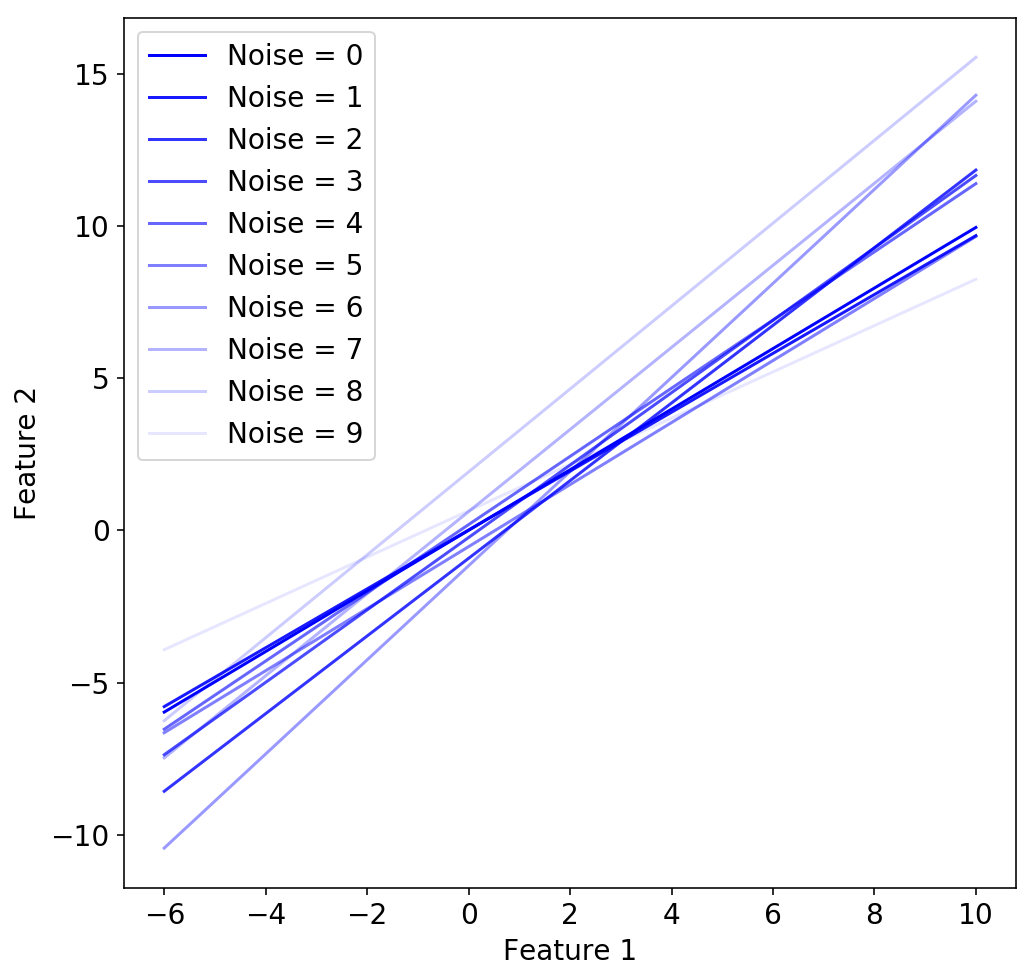

In [14]:
def plot_hyperplane(coeff, interception, i):
    def line(x0):
        return (-(x0 * coeff[0, 0]) - interception[0]) / coeff[0, 1]
    plt.plot([-6, 10], [line(-6), line(10)], '-b', label='Noise = '+str(i), alpha = 1-i*0.1)

for n in range (10):
    X, y = make_two_blobs(n_samples=400, cluster_std=n, random_state=42)
    labels = [0, 1]
    y = np.take(labels, (y < 0.5))

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

    rgr = LogisticRegression()
    rgr.fit(X_train, y_train)

    coef = rgr.coef_
    intercept = rgr.intercept_

    print (coef)
    print (intercept)

    plot_hyperplane(coef, intercept, n)

plt.legend(loc='best')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

With more noise, the boundary seems to get away from the expected boundary (y = x). The variability of the boundary is higher for a high noise.

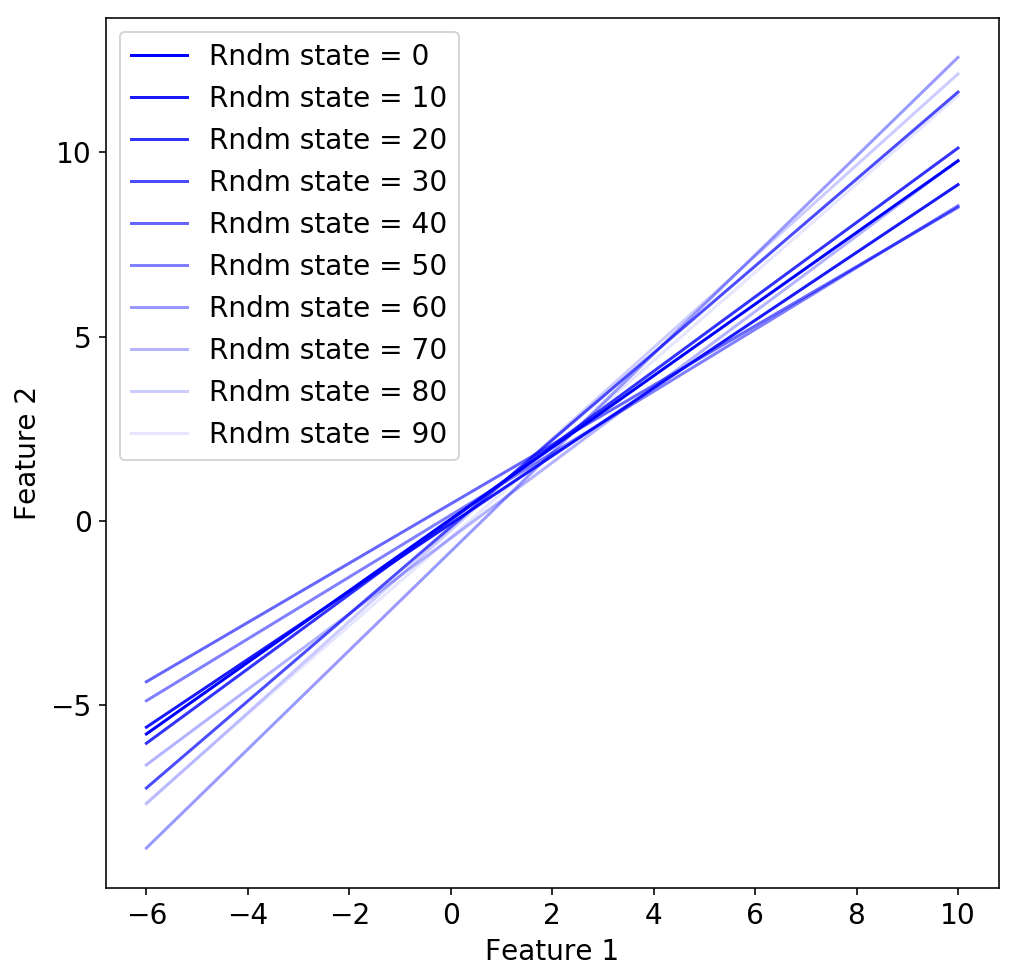

In [15]:
def plot_hyperplane(coeff, interception, i):
    def line(x0):
        return (-(x0 * coeff[0, 0]) - interception[0]) / coeff[0, 1]
    plt.plot([-6, 10], [line(-6), line(10)], '-b', label='Rndm state = '+str(i*10), alpha = 1-i*0.1)

for n in range (10):
    X, y = make_two_blobs(n_samples=400, cluster_std=2., random_state=n*10)
    labels = [0, 1]
    y = np.take(labels, (y < 0.5))

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

    rgr = LogisticRegression()
    rgr.fit(X_train, y_train)

    coef = rgr.coef_
    intercept = rgr.intercept_

    plot_hyperplane(coef, intercept, n)

plt.legend(loc='best')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

**Question 4**

The complexity of a linear model can be increased by using higher powers of each of the features and use these as new features. In shuch a way, minimizing a first order polynomial on these new features is equivalent of fitting a higher order polynomial on the initial features. To solve the problem of the circles, a polynomial of second order is sufficient, as can be seen below.

0.995


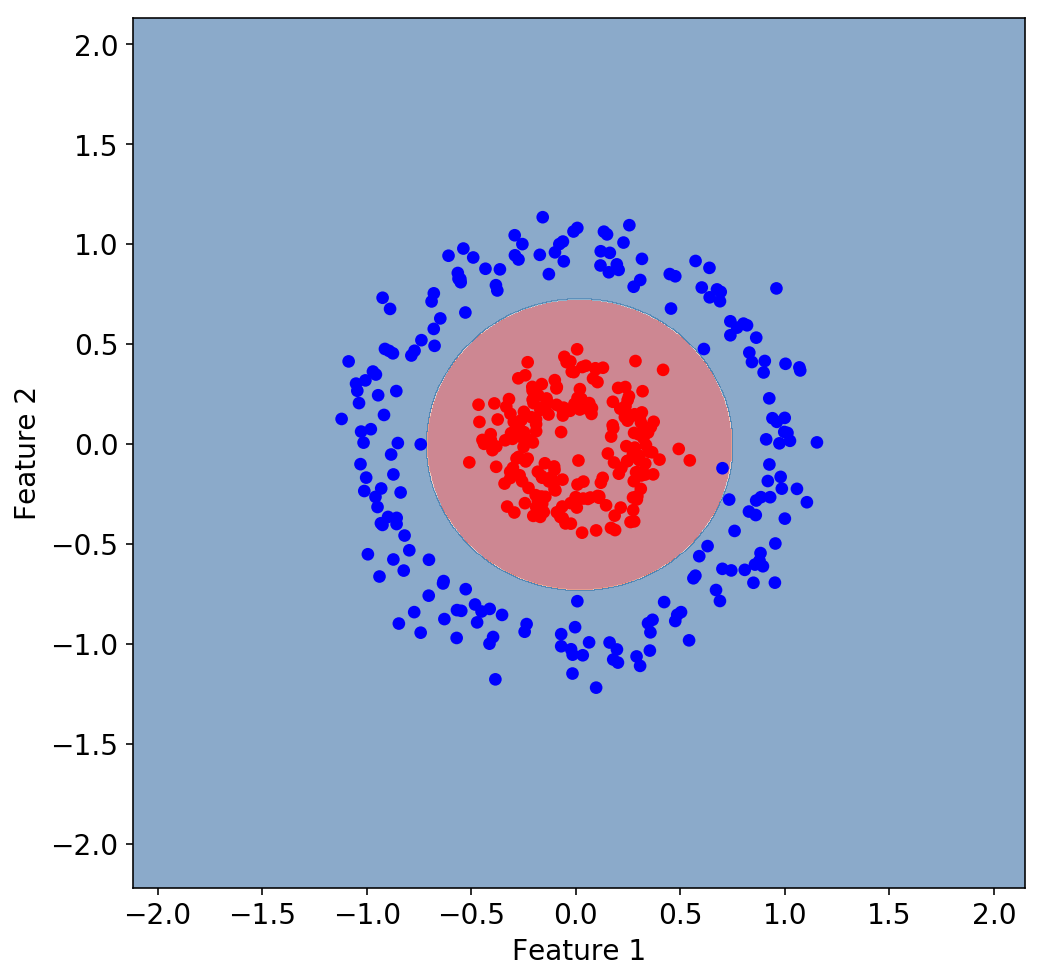

In [22]:
from sklearn.datasets import make_circles
from math import *
from sklearn.pipeline import Pipeline

X, y = make_circles(n_samples=400, factor=.3, noise=.1)

from sklearn.preprocessing import PolynomialFeatures

rgr = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('log', LogisticRegression(C=1))])


labels = [0, 1]
y = np.take(labels, (y < 0.5))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

rgr.fit(X_train, y_train)

# build our grid of values
h = 0.005  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = rgr.predict(np.c_[xx.ravel(), yy.ravel()])
print (rgr.score(X_test, y_test))

Z = Z.reshape(xx.shape)
plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha = 0.5)

labelsS = ['b', 'r']
y = np.take(labelsS, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In the above figure, the decision surface for the category of the blue points is displayed in blue (and respectively for the red points). We can see that the second order model already describes very well the data.

In the following, the accuracy of the model is plotted as a function of the order of the polynomial (i.e. as a function of the model complexity). The accuracy of the model is best for a second order polynomial, which is expectecd for circular distributions.

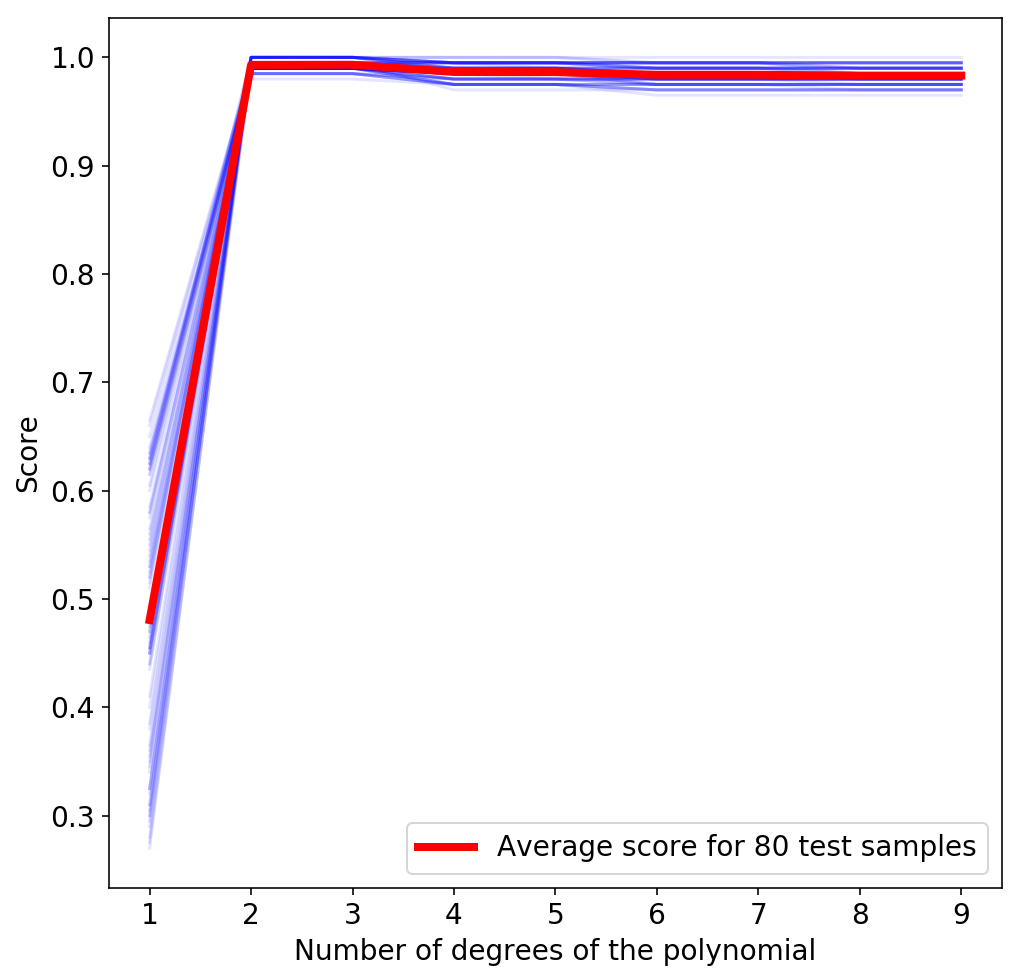

In [20]:
X, y = make_circles(n_samples=400, factor=.3, noise=.1)

labels = [0, 1]
y = np.take(labels, (y < 0.5))
ks = range(1,10)
all_scores = []

for n in range(1,80):
    scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    for i in ks:
        rgr = Pipeline([('poly', PolynomialFeatures(degree=i)),
                    ('log', LogisticRegression(C=1))])
        rgr.fit(X_train, y_train)
        scores.append(rgr.score(X_test, y_test))
    plt.plot(ks, np.array(scores), '-b', alpha=0.1)
    all_scores.append(scores)
    
plt.plot(ks, np.array(all_scores).mean(axis=0), '-r', label='Average score for 80 test samples', lw=4)
plt.legend(loc='best')
plt.xlabel("Number of degrees of the polynomial")
plt.ylabel("Score")